In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

(150, 4)


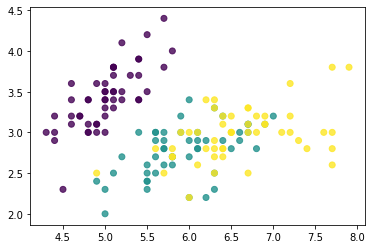

In [6]:
iris = load_iris()

X = iris.data
y = iris.target

print(X.shape)
plt.scatter(X[:, 0], X[:, 1], c=y, alpha=0.8)

In [7]:
#divise ce dataset avec train_test_split

In [8]:
from sklearn.model_selection import train_test_split

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

print('Train set:', X_train.shape)
print('Test set:', X_test.shape)

Train set: (120, 4)
Test set: (30, 4)


Text(0.5, 1.0, 'Test set')

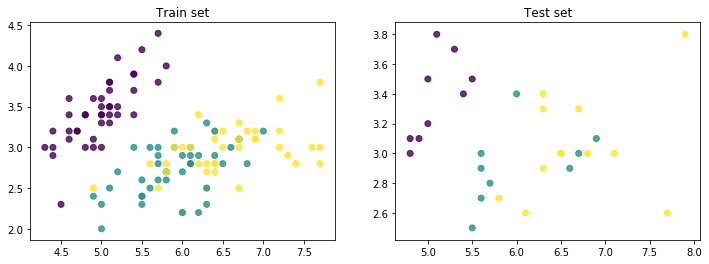

In [15]:
plt.figure(figsize=(12, 4))
plt.subplot(121)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, alpha=0.8)
plt.title('Train set')
plt.subplot(122)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, alpha=0.8)
plt.title('Test set')

In [16]:
from sklearn.neighbors import KNeighborsClassifier

In [17]:
model = KNeighborsClassifier(n_neighbors=1)

model.fit(X_train, y_train)
print('Train score', model.score(X_train, y_train))
print('Test score', model.score(X_test, y_test))

Train score 1.0
Test score 0.9666666666666667


In [18]:
#evalutation du modèle 96%

In [19]:
#améliorer le modèle afin qu'il ce rapproche plus de 100%

In [20]:
#on découpe avec la 3 eme section la validation set , va évaluer la machine pour comparer les set

In [21]:
#avec la cross validation on pourvoir test la validation sur 5 set et être sure du set ayant les meilleur performance

In [22]:
from sklearn.model_selection import cross_val_score

In [23]:
cross_val_score(KNeighborsClassifier(), X_train, y_train, cv=5, scoring='accuracy')

array([1.        , 0.95833333, 0.95833333, 0.91666667, 0.95833333])

In [24]:
#on peux en faire la moyenne

In [25]:
cross_val_score(KNeighborsClassifier(), X_train, y_train, cv=5, scoring='accuracy').mean()

0.9583333333333334

In [26]:
#pour évaluer plus vite, en enregistrant chaque score que l'on obtient dans une liste validation score

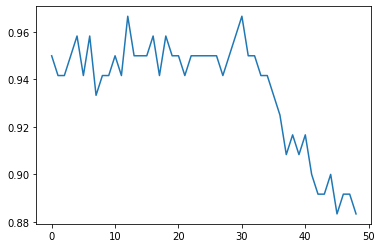

In [28]:
val_score = []
for k in range(1,50):
    score = cross_val_score(KNeighborsClassifier(k), X_train, y_train, cv=5).mean()
    val_score.append(score)
plt.plot(val_score)

In [29]:
#avec validation curve

In [30]:
from sklearn.model_selection import validation_curve

In [31]:
model = KNeighborsClassifier()
k = np.arange(1,50)

train_score, val_score = validation_curve(model, X_train, y_train, 'n_neighbors', k, cv=5)

val_score.mean(axis=1)

array([0.95      , 0.94166667, 0.94166667, 0.95      , 0.95833333,
       0.94166667, 0.95833333, 0.93333333, 0.94166667, 0.94166667,
       0.95      , 0.94166667, 0.96666667, 0.95      , 0.95      ,
       0.95      , 0.95833333, 0.94166667, 0.95833333, 0.95      ,
       0.95      , 0.94166667, 0.95      , 0.95      , 0.95      ,
       0.95      , 0.95      , 0.94166667, 0.95      , 0.95833333,
       0.96666667, 0.95      , 0.95      , 0.94166667, 0.94166667,
       0.93333333, 0.925     , 0.90833333, 0.91666667, 0.90833333,
       0.91666667, 0.9       , 0.89166667, 0.89166667, 0.9       ,
       0.88333333, 0.89166667, 0.89166667, 0.88333333])

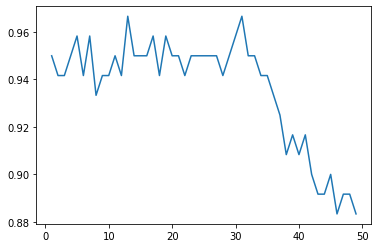

In [32]:
plt.plot(k, val_score.mean(axis=1))

In [33]:
#on obtient le même graph

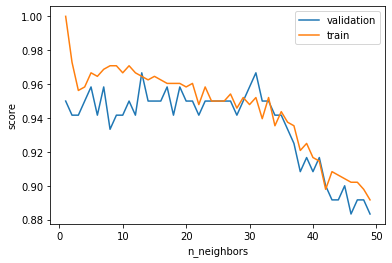

In [35]:
model = KNeighborsClassifier()
k = np.arange(1,50)

train_score, val_score = validation_curve(model, X_train, y_train, 'n_neighbors', k, cv=5)

plt.plot(k, val_score.mean(axis=1), label='validation')
plt.plot(k, train_score.mean(axis=1), label='train')

plt.ylabel('score')
plt.xlabel('n_neighbors')

plt.legend()

In [36]:
#gridsearchcv me permet de toruver le modèle avec les meilleurs hyper paramètre en comparant le différente performance

In [39]:
from sklearn.model_selection import GridSearchCV

In [42]:
param_grid = {'n_neighbors': np.arange(1,20),
             'metric': ['euclidean', 'manhattan']}

grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)

grid.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [44]:
grid.best_score_

0.9666666666666668

In [45]:
grid.best_params_

{'metric': 'euclidean', 'n_neighbors': 13}

In [46]:
model = grid.best_estimator_

In [47]:
model.score(X_test,y_test)

0.9666666666666667

In [48]:
#donc on aurait 96% dans la vrai vie

In [49]:
from sklearn.metrics import confusion_matrix

In [50]:
confusion_matrix(y_test, model.predict(X_test))

array([[ 9,  0,  0],
       [ 0,  8,  1],
       [ 0,  0, 12]])